# Likelihood Functions

The likelihood ratio for two Gaussian distributions with shifted means and equal variance is monotone.
As such, a threshold test on the likelihood ratio becomes equivalent to a threshold test on the observed value.
Two such distributions and their likelihood ratio appear below.

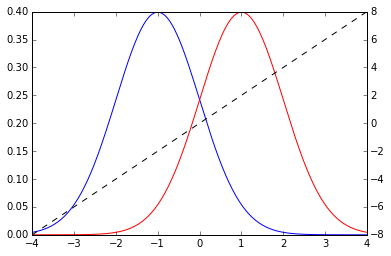

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline

fig, ax1 = plt.subplots()
mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu0, sigma0))

mu1 = 1
variance1 = 1
sigma1 = math.sqrt(variance1)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),color='r')

ax2 = ax1.twinx()
ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')

plt.show()



## Example of ROC curves

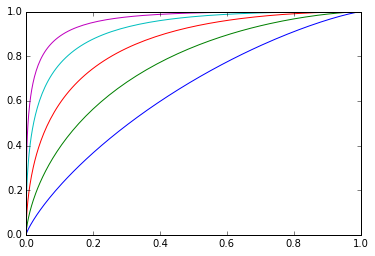

In [3]:
from scipy.stats import norm

fig, ax1 = plt.subplots()

x = np.linspace(-4, 4, 200)
mu = np.linspace(0.25, 1.5, 6)
for index in range(5):
    mu0 = -mu[index]
    mu1 = mu[index]
    ax1.plot(norm.cdf((x-mu1)/sigma1),norm.cdf((x-mu0)/sigma0))
plt.show()

In general, the likelihood ratio need not be a monotone function.
Consider the example below where two Gaussian distributions, with different means and variances.

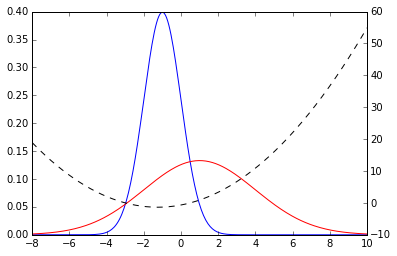

In [27]:
fig, ax1 = plt.subplots()

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-8, 10, 300)
step = 18/299
ax1.plot(x,mlab.normpdf(x, mu0, sigma0),'b-')
y1 = mlab.normpdf(x, mu0, sigma0)

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),'r-')
y2 = mlab.normpdf(x, mu1, sigma1)

ax2 = ax1.twinx()
ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')
y3 = np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0))

plt.show()




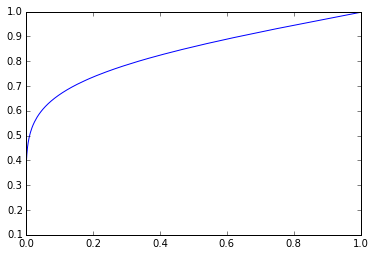

In [28]:
fig, ax1 = plt.subplots()

vals = np.linspace(-2, 12, 200)
ROCx = []
ROCy = []
for t in vals:
    minPoint = np.argmin(y3)
    int1 = 0
    int2 = 0
    mindiff = 999
    for i in range(0, minPoint):
        if(abs(y3[i]-t)<mindiff):
            mindiff = abs(y3[i]-t)
            int1 = i
    mindiff = 999
    for i in range(minPoint, len(y3)):
        if(abs(y3[i]-t)<mindiff):
            mindiff = abs(y3[i]-t)
            int2 = i
    fa = 0
    det = 0
    for i in range(0, int1+1):
        fa+=y1[i]*step
        det+=y2[i]*step
    for i in range(int2, len(y1)):
        fa+=y1[i]*step
        det+=y2[i]*step
    ROCx.append(fa)
    ROCy.append(det)
ax1.plot(ROCx, ROCy)
plt.show()